100%|██████████| 1/1 [00:00<00:00, 999.36it/s]


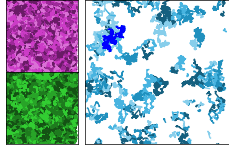

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from spit.analysis.functions import dimertracks as dimertracks

plt.style.use(
    r'U:\DNA-PAINT-SPT\nature_7pt_video.mplstyle')
path_data = r'U:\DNA-PAINT-SPT\Fig1C\data'

# %% Plot: tracks and coloc tracks

# Load data
path_ch0 = r'U:\DNA-PAINT-SPT\Fig1DE\data\ch0_tracks.csv'
path_ch1 = r'U:\DNA-PAINT-SPT\Fig1DE\data\ch1_tracks.csv'
path_coloc = r'U:\DNA-PAINT-SPT\Fig1DE\data\colocs.csv'

# Parameters
filter_length_tracks = 25  # prevent too crowded figure
filter_length_cotracks = 8  # prevent too crowded figure

filter_D = 0.01  # immobile particles
cotrack = 10  # highlighted co-diffusion trajectory
start = 0
end = 1000  # display only first 1000 frames (40 seconds)


df_tracks_ch0, df_stats_ch0 = dimertracks.prepare_tracks(
    path_ch0, filter_length=filter_length_tracks, start=start, end=end, filter_D=filter_D)
df_tracks_ch1, df_stats_ch1 = dimertracks.prepare_tracks(
    path_ch1, filter_length=filter_length_tracks, start=start, end=end, filter_D=filter_D)
df_tracks_coloc, df_stats_coloc = dimertracks.prepare_tracks(
    path_coloc, filter_length=filter_length_cotracks, start=start, end=end, filter_D=filter_D)
df_tracks_all = dimertracks.prepare_tracks_cotracks(
    df_tracks_coloc, df_tracks_ch0, df_tracks_ch1)

# Plot
f = plt.figure()
f.set_figheight(1.8)
f.set_figwidth(2.7)
f.subplots_adjust(left=0.1, right=0.95, bottom=0.15,
                  top=0.95, wspace=0.0, hspace=0.0)
axd = f.subplot_mosaic([['ch0', 'coloc', 'coloc'], ['ch1', 'coloc', 'coloc']],
                       gridspec_kw={"wspace": 0.0, "hspace": 0.0, })

dimertracks.plot_tracks(df_tracks_ch0, color='orchid',
                        path=path_data, ax=axd['ch0'])
dimertracks.plot_tracks(df_tracks_ch1, color='limegreen',
                        path=path_data, ax=axd['ch1'])
dimertracks.plot_tracks(df_tracks_coloc, color='skyblue',
                        path=path_data, ax=axd['coloc'])
dimertracks.plot_tracks(df_tracks_coloc.loc[df_tracks_coloc['track.id']
                        == cotrack], color='blue', path=path_data, ax=axd['coloc'])

for k in axd:
    axd[k].set_rasterized(True)
    axd[k].spines.right.set_visible(True)
    axd[k].spines.top.set_visible(True)
    axd[k].invert_xaxis()


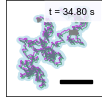

In [7]:
#%% Plot: Individual dimer track (zoomed-in)

# Load data
df_tracks_ch0 = pd.read_csv(path_ch0)
df_tracks_ch1 = pd.read_csv(path_ch1)
df_tracks_coloc = pd.read_csv(path_coloc)

df_tracks_all = dimertracks.prepare_tracks_cotracks(
    df_tracks_coloc, df_tracks_ch0, df_tracks_ch1)

# Select highlighted co-diffusion trajectory
cotrack = 10
df_cotracksC = df_tracks_coloc.loc[df_tracks_coloc['track.id'] == cotrack]

# Plot
f, ax = plt.subplots(1, 1)
f.set_figheight(1.2)
f.set_figwidth(1.2)
f.subplots_adjust(left=0.1, right=0.95, bottom=0.15,
                  top=0.95, wspace=0.0, hspace=0.0)
ax.set_aspect('equal')
ax.spines.right.set_visible(True)
ax.spines.top.set_visible(True)

box_length = 15000  # zoom
shift = 100  # respective shift between tracks for better visualization

dimertracks.plot_individual_dimer_tracks(
    df_cotracksC, df_tracks_all, path=None, ax=ax, box_length=box_length, shift=shift)

scalebar_nm = 5000
bar = AnchoredSizeBar(ax.transData, scalebar_nm, '', loc='lower right', pad=0.02,
                      borderpad=1, sep=-4, frameon=False, size_vertical=400, color='black')
ax.add_artist(bar)
ax.invert_xaxis()